In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/final_data_model2.csv', index_col=['user_id','book_id'])
data.head()

rating  user_avg_rating  \
user_id                          book_id                             
000192962b87d560f00b06fdcbd71681 30025791       5              5.0   
0005a08accd53b1e19c52109a1f478cb 59960          0              3.4   
000700ecd5db3a9b0c4e392ed2e4f70b 11790194       5              5.0   
0008931c0cde961e9c802c5a58196d23 500503         5              5.0   
                                 6081685        5              5.0   

                                           book_cluster  \
user_id                          book_id                  
000192962b87d560f00b06fdcbd71681 30025791           0.0   
0005a08accd53b1e19c52109a1f478cb 59960              2.0   
000700ecd5db3a9b0c4e392ed2e4f70b 11790194           0.0   
0008931c0cde961e9c802c5a58196d23 500503             1.0   
                                 6081685            1.0   

                                           user_avg_rating_by_cluster  \
user_id                          book_id                                
000192962b87d560f00b06fdcbd71681 30025791                         5.0   
0005a08accd53b1e19c52109a1f478cb 59960                            0.0   
000700ecd5db3a9b0c4e392ed2e4f70b 11790194                         5.0   
0008931c0cde961e9c802c5a58196d23 500503                           5.0   
                                 6081685                          5.0   

                                          review_sentiment  book_avg_rating  \
user_id                          book_id                                      
000192962b87d560f00b06fdcbd71681 30025791         positive             4.19   
0005a08accd53b1e19c52109a1f478cb 59960            positive             4.25   
000700ecd5db3a9b0c4e392ed2e4f70b 11790194         negative             4.04   
0008931c0cde961e9c802c5a58196d23 500503           positive             4.29   
                                 6081685          positive             4.40   

                                           most_similar_book_rating  \
user_id                          book_id                              
000192962b87d560f00b06fdcbd71681 30025791                      4.32   
0005a08accd53b1e19c52109a1f478cb 59960                         4.25   
000700ecd5db3a9b0c4e392ed2e4f70b 11790194                      3.79   
0008931c0cde961e9c802c5a58196d23 500503                        4.42   
                                 6081685                       4.53   

                                           2nd_similar_book_rating  \
user_id                          book_id                             
000192962b87d560f00b06fdcbd71681 30025791                     4.58   
0005a08accd53b1e19c52109a1f478cb 59960                        4.25   
000700ecd5db3a9b0c4e392ed2e4f70b 11790194                     4.33   
0008931c0cde961e9c802c5a58196d23 500503                       4.43   
                                 6081685                      4.48   

                                           3rd_similar_book_rating  
user_id                          book_id                            
000192962b87d560f00b06fdcbd71681 30025791                     4.20  
0005a08accd53b1e19c52109a1f478cb 59960                        4.25  
000700ecd5db3a9b0c4e392ed2e4f70b 11790194                     3.79  
0008931c0cde961e9c802c5a58196d23 500503                       4.40  
                                 6081685                      4.50

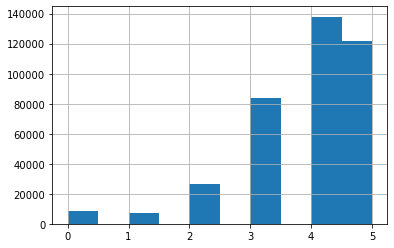

In [3]:
data.rating.hist()

In [4]:
display(data.groupby('rating')['user_avg_rating'].count())
display(len(data))

rating
0      8802
1      7163
2     26482
3     83554
4    137939
5    121812
Name: user_avg_rating, dtype: int64

385752

In [5]:
# Get percentage of values by rating
data.rating.value_counts(normalize=True)*100

4    35.758467
5    31.577801
3    21.660030
2     6.865032
0     2.281777
1     1.856893
Name: rating, dtype: float64

In [6]:
# Create dummies for the sentiment categories
data = pd.get_dummies(data)
data.head()

rating  user_avg_rating  \
user_id                          book_id                             
000192962b87d560f00b06fdcbd71681 30025791       5              5.0   
0005a08accd53b1e19c52109a1f478cb 59960          0              3.4   
000700ecd5db3a9b0c4e392ed2e4f70b 11790194       5              5.0   
0008931c0cde961e9c802c5a58196d23 500503         5              5.0   
                                 6081685        5              5.0   

                                           book_cluster  \
user_id                          book_id                  
000192962b87d560f00b06fdcbd71681 30025791           0.0   
0005a08accd53b1e19c52109a1f478cb 59960              2.0   
000700ecd5db3a9b0c4e392ed2e4f70b 11790194           0.0   
0008931c0cde961e9c802c5a58196d23 500503             1.0   
                                 6081685            1.0   

                                           user_avg_rating_by_cluster  \
user_id                          book_id                                
000192962b87d560f00b06fdcbd71681 30025791                         5.0   
0005a08accd53b1e19c52109a1f478cb 59960                            0.0   
000700ecd5db3a9b0c4e392ed2e4f70b 11790194                         5.0   
0008931c0cde961e9c802c5a58196d23 500503                           5.0   
                                 6081685                          5.0   

                                           book_avg_rating  \
user_id                          book_id                     
000192962b87d560f00b06fdcbd71681 30025791             4.19   
0005a08accd53b1e19c52109a1f478cb 59960                4.25   
000700ecd5db3a9b0c4e392ed2e4f70b 11790194             4.04   
0008931c0cde961e9c802c5a58196d23 500503               4.29   
                                 6081685              4.40   

                                           most_similar_book_rating  \
user_id                          book_id                              
000192962b87d560f00b06fdcbd71681 30025791                      4.32   
0005a08accd53b1e19c52109a1f478cb 59960                         4.25   
000700ecd5db3a9b0c4e392ed2e4f70b 11790194                      3.79   
0008931c0cde961e9c802c5a58196d23 500503                        4.42   
                                 6081685                       4.53   

                                           2nd_similar_book_rating  \
user_id                          book_id                             
000192962b87d560f00b06fdcbd71681 30025791                     4.58   
0005a08accd53b1e19c52109a1f478cb 59960                        4.25   
000700ecd5db3a9b0c4e392ed2e4f70b 11790194                     4.33   
0008931c0cde961e9c802c5a58196d23 500503                       4.43   
                                 6081685                      4.48   

                                           3rd_similar_book_rating  \
user_id                          book_id                             
000192962b87d560f00b06fdcbd71681 30025791                     4.20   
0005a08accd53b1e19c52109a1f478cb 59960                        4.25   
000700ecd5db3a9b0c4e392ed2e4f70b 11790194                     3.79   
0008931c0cde961e9c802c5a58196d23 500503                       4.40   
                                 6081685                      4.50   

                                           review_sentiment_negative  \
user_id                          book_id                               
000192962b87d560f00b06fdcbd71681 30025791                          0   
0005a08accd53b1e19c52109a1f478cb 59960                             0   
000700ecd5db3a9b0c4e392ed2e4f70b 11790194                          1   
0008931c0cde961e9c802c5a58196d23 500503                            0   
                                 6081685                           0   

                                           review_sentiment_neutral  \
user_id                          book_id                              
000192962b87d560f00b06fdcbd71681 30025791                       

In [7]:
from sklearn.preprocessing import StandardScaler

# Define X,y
X = data.drop('rating', axis=1)
y = data.rating

# Preprocessing
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

In [8]:
# Split into training/testing sets
from sklearn.model_selection import train_test_split

y = y.ravel()
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state = 2)

# Model 1: KNN

First I'll use KNN as a base model. Will compare this model results to those of the base KNN without the additional features

In [9]:
# First will just run it "out of the box"
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
knn = KNeighborsClassifier()
model_1 = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [10]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred, labels=[0,1,2,3,4,5]))

[[ 1250    68   214   350   233    65]
 [   80   355   450   632   267    28]
 [  130   341  1731  2704  1573   207]
 [  150   343  1939  9464  7621  1395]
 [  121   149  1124  8025 19043  5836]
 [   71    34   319  2858  9341 17927]]


In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, digits=2))

              precision    recall  f1-score   support

           0       0.69      0.57      0.63      2180
           1       0.28      0.20      0.23      1812
           2       0.30      0.26      0.28      6686
           3       0.39      0.45      0.42     20912
           4       0.50      0.56      0.53     34298
           5       0.70      0.59      0.64     30550

    accuracy                           0.52     96438
   macro avg       0.48      0.44      0.45     96438
weighted avg       0.53      0.52      0.52     96438



In [13]:
# KNN parameter tuning
from sklearn.model_selection import GridSearchCV

# Grid of parameters to test over
leaf_size = list(range(1,15, 2))
n_neighbors = list(range(1,25, 2))
p = [1,2]

param_grid = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

gs = GridSearchCV(knn, param_grid, verbose=1, cv=5, n_jobs=-1)

gs_results = gs.fit(X_train, y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 29.1min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 50.4min
[Parallel(n_jobs=-1)]: Done 840 out of 840 | elapsed: 54.7min finished


In [15]:
print('Best score:{}'.format(gs_results.best_score_))
print('Best parameters:{}'.format(gs_results.best_params_))

Best score:0.5550370860258513
Best parameters:{'leaf_size': 9, 'n_neighbors': 23, 'p': 1}


In [24]:
knn = KNeighborsClassifier(leaf_size=9, n_neighbors=23, p=1)
model_1 = knn.fit(X_train, y_train)
y_pred1 = knn.predict(X_test)

In [17]:
print(classification_report(y_test, y_pred1, digits=2))

              precision    recall  f1-score   support

           0       0.86      0.56      0.68      2180
           1       0.54      0.13      0.21      1812
           2       0.43      0.20      0.28      6686
           3       0.44      0.46      0.45     20912
           4       0.50      0.66      0.57     34298
           5       0.74      0.60      0.66     30550

    accuracy                           0.55     96438
   macro avg       0.59      0.44      0.47     96438
weighted avg       0.57      0.55      0.55     96438



# Model 2: Decision Tree

Let's try decision tree algorithm.

In [18]:
from sklearn.tree import DecisionTreeClassifier

model_2 = DecisionTreeClassifier(criterion='gini',max_depth=3)

model_2.fit(X_train, y_train)

y_pred = model_2.predict(X_test)

In [19]:
print(confusion_matrix(y_test, y_pred, labels=[0,1,2,3,4,5]))
print(classification_report(y_test, y_pred, digits=2))

[[ 1118     0     0   868   176    18]
 [    4     0     0  1401   397    10]
 [    6     0     0  4700  1914    66]
 [    6     0     0 11633  8745   528]
 [   13     0     0  8361 22350  3574]
 [   19     0     0  2645 11604 16282]]
              precision    recall  f1-score   support

           0       0.96      0.51      0.67      2180
           1       0.00      0.00      0.00      1812
           2       0.00      0.00      0.00      6686
           3       0.39      0.56      0.46     20912
           4       0.49      0.65      0.56     34298
           5       0.80      0.53      0.64     30550

    accuracy                           0.53     96438
   macro avg       0.44      0.38      0.39     96438
weighted avg       0.53      0.53      0.52     96438



/Users/mark/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
# Decision Tree parameter tuning
param_grid = {
    'max_depth' : np.arange(3,10),
    'criterion' : ['entropy', 'gini'],
    'min_samples_leaf' : np.arange(3,10)
}
tree = DecisionTreeClassifier()
gs2 = GridSearchCV(tree, param_grid, verbose=1, cv=5)

gs2_results = gs2.fit(X_train, y_train)

Fitting 5 folds for each of 98 candidates, totalling 490 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 490 out of 490 | elapsed:  3.7min finished


In [23]:
print('Best score:{}'.format(gs2_results.best_score_))
print('Best parameters:{}'.format(gs2_results.best_params_))

Best score:0.5699274811161846
Best parameters:{'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 9}


In [25]:
# Fit best parameters
tree = DecisionTreeClassifier(criterion='entropy',max_depth=9,
                             min_samples_leaf=9)
model2 = tree.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)

In [26]:
# print classification report
print(classification_report(y_test, y_pred2, digits=2))

              precision    recall  f1-score   support

           0       0.87      0.57      0.69      2180
           1       0.70      0.16      0.27      1812
           2       0.51      0.22      0.31      6686
           3       0.48      0.41      0.44     20912
           4       0.50      0.72      0.60     34298
           5       0.76      0.60      0.67     30550

    accuracy                           0.57     96438
   macro avg       0.64      0.45      0.50     96438
weighted avg       0.59      0.57      0.56     96438



# Model 3: Random Forest

Lastly, random forest

In [27]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
model_3 = rfc.fit(X_train, y_train)
y_pred3 = model_3.predict(X_test)

In [28]:
print(classification_report(y_test, y_pred3, digits=2))

              precision    recall  f1-score   support

           0       0.80      0.59      0.68      2180
           1       0.49      0.20      0.28      1812
           2       0.41      0.25      0.31      6686
           3       0.45      0.45      0.45     20912
           4       0.51      0.61      0.55     34298
           5       0.69      0.64      0.66     30550

    accuracy                           0.55     96438
   macro avg       0.56      0.46      0.49     96438
weighted avg       0.55      0.55      0.55     96438



In [32]:
# Random forest param tuning
param_grid3 = {
    'n_estimators':np.arange(100,500,100),
    'max_depth':[None, 3, 4, 6, 7, 8, 9, 10, 15, 20],
    'min_samples_leaf':np.arange(3,10, 2)
}

rfc = RandomForestClassifier()
gs3 = GridSearchCV(rfc, param_grid3, verbose=5, cv=5)
gs3.results = gs3.fit(X_train, y_train)

Fitting 5 folds for each of 160 candidates, totalling 800 fits
[CV] max_depth=None, min_samples_leaf=3, n_estimators=100 ............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=None, min_samples_leaf=3, n_estimators=100, score=0.571, total=  34.7s
[CV] max_depth=None, min_samples_leaf=3, n_estimators=100 ............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   34.7s remaining:    0.0s


[CV]  max_depth=None, min_samples_leaf=3, n_estimators=100, score=0.572, total=  34.3s
[CV] max_depth=None, min_samples_leaf=3, n_estimators=100 ............


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.2min remaining:    0.0s


[CV]  max_depth=None, min_samples_leaf=3, n_estimators=100, score=0.571, total=  34.3s
[CV] max_depth=None, min_samples_leaf=3, n_estimators=100 ............


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.7min remaining:    0.0s


[CV]  max_depth=None, min_samples_leaf=3, n_estimators=100, score=0.572, total=  34.3s
[CV] max_depth=None, min_samples_leaf=3, n_estimators=100 ............


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  2.3min remaining:    0.0s


[CV]  max_depth=None, min_samples_leaf=3, n_estimators=100, score=0.571, total=  34.2s
[CV] max_depth=None, min_samples_leaf=3, n_estimators=200 ............
[CV]  max_depth=None, min_samples_leaf=3, n_estimators=200, score=0.572, total= 1.2min
[CV] max_depth=None, min_samples_leaf=3, n_estimators=200 ............
[CV]  max_depth=None, min_samples_leaf=3, n_estimators=200, score=0.573, total= 1.1min
[CV] max_depth=None, min_samples_leaf=3, n_estimators=200 ............
[CV]  max_depth=None, min_samples_leaf=3, n_estimators=200, score=0.574, total= 1.1min
[CV] max_depth=None, min_samples_leaf=3, n_estimators=200 ............
[CV]  max_depth=None, min_samples_leaf=3, n_estimators=200, score=0.573, total= 1.1min
[CV] max_depth=None, min_samples_leaf=3, n_estimators=200 ............
[CV]  max_depth=None, min_samples_leaf=3, n_estimators=200, score=0.571, total= 1.2min
[CV] max_depth=None, min_samples_leaf=3, n_estimators=300 ............
[CV]  max_depth=None, min_samples_leaf=3, n_estimato

[CV]  max_depth=None, min_samples_leaf=7, n_estimators=400, score=0.578, total= 2.0min
[CV] max_depth=None, min_samples_leaf=7, n_estimators=400 ............
[CV]  max_depth=None, min_samples_leaf=7, n_estimators=400, score=0.578, total= 2.0min
[CV] max_depth=None, min_samples_leaf=7, n_estimators=400 ............
[CV]  max_depth=None, min_samples_leaf=7, n_estimators=400, score=0.577, total= 2.0min
[CV] max_depth=None, min_samples_leaf=7, n_estimators=400 ............
[CV]  max_depth=None, min_samples_leaf=7, n_estimators=400, score=0.576, total= 2.0min
[CV] max_depth=None, min_samples_leaf=9, n_estimators=100 ............
[CV]  max_depth=None, min_samples_leaf=9, n_estimators=100, score=0.576, total=  29.8s
[CV] max_depth=None, min_samples_leaf=9, n_estimators=100 ............
[CV]  max_depth=None, min_samples_leaf=9, n_estimators=100, score=0.579, total=  29.6s
[CV] max_depth=None, min_samples_leaf=9, n_estimators=100 ............
[CV]  max_depth=None, min_samples_leaf=9, n_estimato

[CV]  max_depth=3, min_samples_leaf=5, n_estimators=200, score=0.510, total=  15.6s
[CV] max_depth=3, min_samples_leaf=5, n_estimators=300 ...............
[CV]  max_depth=3, min_samples_leaf=5, n_estimators=300, score=0.509, total=  23.5s
[CV] max_depth=3, min_samples_leaf=5, n_estimators=300 ...............
[CV]  max_depth=3, min_samples_leaf=5, n_estimators=300, score=0.516, total=  23.4s
[CV] max_depth=3, min_samples_leaf=5, n_estimators=300 ...............
[CV]  max_depth=3, min_samples_leaf=5, n_estimators=300, score=0.512, total=  23.5s
[CV] max_depth=3, min_samples_leaf=5, n_estimators=300 ...............
[CV]  max_depth=3, min_samples_leaf=5, n_estimators=300, score=0.510, total=  23.3s
[CV] max_depth=3, min_samples_leaf=5, n_estimators=300 ...............
[CV]  max_depth=3, min_samples_leaf=5, n_estimators=300, score=0.516, total=  23.4s
[CV] max_depth=3, min_samples_leaf=5, n_estimators=400 ...............
[CV]  max_depth=3, min_samples_leaf=5, n_estimators=400, score=0.514, 

[CV]  max_depth=4, min_samples_leaf=3, n_estimators=100, score=0.535, total=  10.3s
[CV] max_depth=4, min_samples_leaf=3, n_estimators=100 ...............
[CV]  max_depth=4, min_samples_leaf=3, n_estimators=100, score=0.533, total=  10.2s
[CV] max_depth=4, min_samples_leaf=3, n_estimators=100 ...............
[CV]  max_depth=4, min_samples_leaf=3, n_estimators=100, score=0.531, total=  10.2s
[CV] max_depth=4, min_samples_leaf=3, n_estimators=200 ...............
[CV]  max_depth=4, min_samples_leaf=3, n_estimators=200, score=0.535, total=  20.7s
[CV] max_depth=4, min_samples_leaf=3, n_estimators=200 ...............
[CV]  max_depth=4, min_samples_leaf=3, n_estimators=200, score=0.537, total=  20.8s
[CV] max_depth=4, min_samples_leaf=3, n_estimators=200 ...............
[CV]  max_depth=4, min_samples_leaf=3, n_estimators=200, score=0.534, total=  20.3s
[CV] max_depth=4, min_samples_leaf=3, n_estimators=200 ...............
[CV]  max_depth=4, min_samples_leaf=3, n_estimators=200, score=0.533, 

[CV]  max_depth=4, min_samples_leaf=7, n_estimators=400, score=0.536, total=  41.1s
[CV] max_depth=4, min_samples_leaf=7, n_estimators=400 ...............
[CV]  max_depth=4, min_samples_leaf=7, n_estimators=400, score=0.536, total=  41.6s
[CV] max_depth=4, min_samples_leaf=7, n_estimators=400 ...............
[CV]  max_depth=4, min_samples_leaf=7, n_estimators=400, score=0.535, total=  41.4s
[CV] max_depth=4, min_samples_leaf=7, n_estimators=400 ...............
[CV]  max_depth=4, min_samples_leaf=7, n_estimators=400, score=0.532, total=  41.0s
[CV] max_depth=4, min_samples_leaf=7, n_estimators=400 ...............
[CV]  max_depth=4, min_samples_leaf=7, n_estimators=400, score=0.531, total=  41.6s
[CV] max_depth=4, min_samples_leaf=9, n_estimators=100 ...............
[CV]  max_depth=4, min_samples_leaf=9, n_estimators=100, score=0.538, total=  10.4s
[CV] max_depth=4, min_samples_leaf=9, n_estimators=100 ...............
[CV]  max_depth=4, min_samples_leaf=9, n_estimators=100, score=0.533, 

[CV]  max_depth=6, min_samples_leaf=5, n_estimators=200, score=0.555, total=  24.9s
[CV] max_depth=6, min_samples_leaf=5, n_estimators=200 ...............
[CV]  max_depth=6, min_samples_leaf=5, n_estimators=200, score=0.552, total=  25.3s
[CV] max_depth=6, min_samples_leaf=5, n_estimators=300 ...............
[CV]  max_depth=6, min_samples_leaf=5, n_estimators=300, score=0.554, total=  37.7s
[CV] max_depth=6, min_samples_leaf=5, n_estimators=300 ...............
[CV]  max_depth=6, min_samples_leaf=5, n_estimators=300, score=0.556, total=  37.3s
[CV] max_depth=6, min_samples_leaf=5, n_estimators=300 ...............
[CV]  max_depth=6, min_samples_leaf=5, n_estimators=300, score=0.557, total=  37.1s
[CV] max_depth=6, min_samples_leaf=5, n_estimators=300 ...............
[CV]  max_depth=6, min_samples_leaf=5, n_estimators=300, score=0.554, total=  37.3s
[CV] max_depth=6, min_samples_leaf=5, n_estimators=300 ...............
[CV]  max_depth=6, min_samples_leaf=5, n_estimators=300, score=0.552, 

[CV]  max_depth=7, min_samples_leaf=3, n_estimators=100, score=0.564, total=  14.0s
[CV] max_depth=7, min_samples_leaf=3, n_estimators=100 ...............
[CV]  max_depth=7, min_samples_leaf=3, n_estimators=100, score=0.563, total=  14.2s
[CV] max_depth=7, min_samples_leaf=3, n_estimators=100 ...............
[CV]  max_depth=7, min_samples_leaf=3, n_estimators=100, score=0.564, total=  14.1s
[CV] max_depth=7, min_samples_leaf=3, n_estimators=100 ...............
[CV]  max_depth=7, min_samples_leaf=3, n_estimators=100, score=0.561, total=  14.2s
[CV] max_depth=7, min_samples_leaf=3, n_estimators=200 ...............
[CV]  max_depth=7, min_samples_leaf=3, n_estimators=200, score=0.563, total=  30.1s
[CV] max_depth=7, min_samples_leaf=3, n_estimators=200 ...............
[CV]  max_depth=7, min_samples_leaf=3, n_estimators=200, score=0.564, total=  31.6s
[CV] max_depth=7, min_samples_leaf=3, n_estimators=200 ...............
[CV]  max_depth=7, min_samples_leaf=3, n_estimators=200, score=0.564, 

[CV]  max_depth=7, min_samples_leaf=7, n_estimators=300, score=0.560, total=  43.1s
[CV] max_depth=7, min_samples_leaf=7, n_estimators=400 ...............
[CV]  max_depth=7, min_samples_leaf=7, n_estimators=400, score=0.562, total=  57.5s
[CV] max_depth=7, min_samples_leaf=7, n_estimators=400 ...............
[CV]  max_depth=7, min_samples_leaf=7, n_estimators=400, score=0.564, total=  57.4s
[CV] max_depth=7, min_samples_leaf=7, n_estimators=400 ...............
[CV]  max_depth=7, min_samples_leaf=7, n_estimators=400, score=0.565, total=  57.1s
[CV] max_depth=7, min_samples_leaf=7, n_estimators=400 ...............
[CV]  max_depth=7, min_samples_leaf=7, n_estimators=400, score=0.563, total=  57.9s
[CV] max_depth=7, min_samples_leaf=7, n_estimators=400 ...............
[CV]  max_depth=7, min_samples_leaf=7, n_estimators=400, score=0.561, total=  56.7s
[CV] max_depth=7, min_samples_leaf=9, n_estimators=100 ...............
[CV]  max_depth=7, min_samples_leaf=9, n_estimators=100, score=0.561, 

[CV]  max_depth=8, min_samples_leaf=5, n_estimators=200, score=0.569, total=  33.9s
[CV] max_depth=8, min_samples_leaf=5, n_estimators=200 ...............
[CV]  max_depth=8, min_samples_leaf=5, n_estimators=200, score=0.568, total=  34.1s
[CV] max_depth=8, min_samples_leaf=5, n_estimators=200 ...............
[CV]  max_depth=8, min_samples_leaf=5, n_estimators=200, score=0.565, total=  34.0s
[CV] max_depth=8, min_samples_leaf=5, n_estimators=300 ...............
[CV]  max_depth=8, min_samples_leaf=5, n_estimators=300, score=0.566, total=  50.9s
[CV] max_depth=8, min_samples_leaf=5, n_estimators=300 ...............
[CV]  max_depth=8, min_samples_leaf=5, n_estimators=300, score=0.569, total=  50.1s
[CV] max_depth=8, min_samples_leaf=5, n_estimators=300 ...............
[CV]  max_depth=8, min_samples_leaf=5, n_estimators=300, score=0.569, total=  51.0s
[CV] max_depth=8, min_samples_leaf=5, n_estimators=300 ...............
[CV]  max_depth=8, min_samples_leaf=5, n_estimators=300, score=0.568, 

[CV]  max_depth=9, min_samples_leaf=3, n_estimators=100, score=0.569, total=  17.5s
[CV] max_depth=9, min_samples_leaf=3, n_estimators=100 ...............
[CV]  max_depth=9, min_samples_leaf=3, n_estimators=100, score=0.571, total=  17.2s
[CV] max_depth=9, min_samples_leaf=3, n_estimators=100 ...............
[CV]  max_depth=9, min_samples_leaf=3, n_estimators=100, score=0.571, total=  17.4s
[CV] max_depth=9, min_samples_leaf=3, n_estimators=100 ...............
[CV]  max_depth=9, min_samples_leaf=3, n_estimators=100, score=0.572, total=  17.3s
[CV] max_depth=9, min_samples_leaf=3, n_estimators=100 ...............
[CV]  max_depth=9, min_samples_leaf=3, n_estimators=100, score=0.570, total=  17.5s
[CV] max_depth=9, min_samples_leaf=3, n_estimators=200 ...............
[CV]  max_depth=9, min_samples_leaf=3, n_estimators=200, score=0.569, total=  34.5s
[CV] max_depth=9, min_samples_leaf=3, n_estimators=200 ...............
[CV]  max_depth=9, min_samples_leaf=3, n_estimators=200, score=0.573, 

[CV]  max_depth=9, min_samples_leaf=7, n_estimators=300, score=0.572, total=  51.8s
[CV] max_depth=9, min_samples_leaf=7, n_estimators=300 ...............
[CV]  max_depth=9, min_samples_leaf=7, n_estimators=300, score=0.568, total=  51.8s
[CV] max_depth=9, min_samples_leaf=7, n_estimators=400 ...............
[CV]  max_depth=9, min_samples_leaf=7, n_estimators=400, score=0.569, total= 1.1min
[CV] max_depth=9, min_samples_leaf=7, n_estimators=400 ...............
[CV]  max_depth=9, min_samples_leaf=7, n_estimators=400, score=0.572, total= 1.2min
[CV] max_depth=9, min_samples_leaf=7, n_estimators=400 ...............
[CV]  max_depth=9, min_samples_leaf=7, n_estimators=400, score=0.571, total= 1.2min
[CV] max_depth=9, min_samples_leaf=7, n_estimators=400 ...............
[CV]  max_depth=9, min_samples_leaf=7, n_estimators=400, score=0.572, total= 1.2min
[CV] max_depth=9, min_samples_leaf=7, n_estimators=400 ...............
[CV]  max_depth=9, min_samples_leaf=7, n_estimators=400, score=0.569, 

[CV]  max_depth=10, min_samples_leaf=5, n_estimators=200, score=0.575, total=  37.2s
[CV] max_depth=10, min_samples_leaf=5, n_estimators=200 ..............
[CV]  max_depth=10, min_samples_leaf=5, n_estimators=200, score=0.573, total=  37.3s
[CV] max_depth=10, min_samples_leaf=5, n_estimators=200 ..............
[CV]  max_depth=10, min_samples_leaf=5, n_estimators=200, score=0.574, total=  37.6s
[CV] max_depth=10, min_samples_leaf=5, n_estimators=200 ..............
[CV]  max_depth=10, min_samples_leaf=5, n_estimators=200, score=0.572, total=  37.2s
[CV] max_depth=10, min_samples_leaf=5, n_estimators=300 ..............
[CV]  max_depth=10, min_samples_leaf=5, n_estimators=300, score=0.571, total=  55.5s
[CV] max_depth=10, min_samples_leaf=5, n_estimators=300 ..............
[CV]  max_depth=10, min_samples_leaf=5, n_estimators=300, score=0.574, total=  56.5s
[CV] max_depth=10, min_samples_leaf=5, n_estimators=300 ..............
[CV]  max_depth=10, min_samples_leaf=5, n_estimators=300, score=

[CV]  max_depth=10, min_samples_leaf=9, n_estimators=400, score=0.572, total= 1.3min
[CV] max_depth=15, min_samples_leaf=3, n_estimators=100 ..............
[CV]  max_depth=15, min_samples_leaf=3, n_estimators=100, score=0.575, total=  27.1s
[CV] max_depth=15, min_samples_leaf=3, n_estimators=100 ..............
[CV]  max_depth=15, min_samples_leaf=3, n_estimators=100, score=0.577, total=  27.0s
[CV] max_depth=15, min_samples_leaf=3, n_estimators=100 ..............
[CV]  max_depth=15, min_samples_leaf=3, n_estimators=100, score=0.578, total=  27.2s
[CV] max_depth=15, min_samples_leaf=3, n_estimators=100 ..............
[CV]  max_depth=15, min_samples_leaf=3, n_estimators=100, score=0.578, total=  26.9s
[CV] max_depth=15, min_samples_leaf=3, n_estimators=100 ..............
[CV]  max_depth=15, min_samples_leaf=3, n_estimators=100, score=0.576, total=  27.2s
[CV] max_depth=15, min_samples_leaf=3, n_estimators=200 ..............
[CV]  max_depth=15, min_samples_leaf=3, n_estimators=200, score=

[CV]  max_depth=15, min_samples_leaf=7, n_estimators=300, score=0.577, total= 1.4min
[CV] max_depth=15, min_samples_leaf=7, n_estimators=300 ..............
[CV]  max_depth=15, min_samples_leaf=7, n_estimators=300, score=0.579, total= 1.4min
[CV] max_depth=15, min_samples_leaf=7, n_estimators=300 ..............
[CV]  max_depth=15, min_samples_leaf=7, n_estimators=300, score=0.576, total= 1.3min
[CV] max_depth=15, min_samples_leaf=7, n_estimators=400 ..............
[CV]  max_depth=15, min_samples_leaf=7, n_estimators=400, score=0.575, total= 1.7min
[CV] max_depth=15, min_samples_leaf=7, n_estimators=400 ..............
[CV]  max_depth=15, min_samples_leaf=7, n_estimators=400, score=0.578, total= 1.7min
[CV] max_depth=15, min_samples_leaf=7, n_estimators=400 ..............
[CV]  max_depth=15, min_samples_leaf=7, n_estimators=400, score=0.578, total= 1.7min
[CV] max_depth=15, min_samples_leaf=7, n_estimators=400 ..............
[CV]  max_depth=15, min_samples_leaf=7, n_estimators=400, score=

[CV]  max_depth=20, min_samples_leaf=5, n_estimators=200, score=0.577, total=  59.4s
[CV] max_depth=20, min_samples_leaf=5, n_estimators=200 ..............
[CV]  max_depth=20, min_samples_leaf=5, n_estimators=200, score=0.579, total=  60.0s
[CV] max_depth=20, min_samples_leaf=5, n_estimators=200 ..............
[CV]  max_depth=20, min_samples_leaf=5, n_estimators=200, score=0.578, total=36.0min
[CV] max_depth=20, min_samples_leaf=5, n_estimators=200 ..............
[CV]  max_depth=20, min_samples_leaf=5, n_estimators=200, score=0.577, total=  59.9s
[CV] max_depth=20, min_samples_leaf=5, n_estimators=200 ..............
[CV]  max_depth=20, min_samples_leaf=5, n_estimators=200, score=0.576, total= 1.0min
[CV] max_depth=20, min_samples_leaf=5, n_estimators=300 ..............
[CV]  max_depth=20, min_samples_leaf=5, n_estimators=300, score=0.577, total= 1.5min
[CV] max_depth=20, min_samples_leaf=5, n_estimators=300 ..............
[CV]  max_depth=20, min_samples_leaf=5, n_estimators=300, score=

[CV]  max_depth=20, min_samples_leaf=9, n_estimators=400, score=0.577, total= 2.2min
[CV] max_depth=20, min_samples_leaf=9, n_estimators=400 ..............
[CV]  max_depth=20, min_samples_leaf=9, n_estimators=400, score=0.577, total= 2.2min


[Parallel(n_jobs=1)]: Done 800 out of 800 | elapsed: 701.6min finished


In [34]:
gs3_results = gs3.results
print('Best score:{}'.format(gs3_results.best_score_))
print('Best parameters:{}'.format(gs3_results.best_params_))

Best score:0.5783646748517667
Best parameters:{'max_depth': 20, 'min_samples_leaf': 7, 'n_estimators': 300}


In [36]:
# Fit best parameters
rfc = RandomForestClassifier(max_depth=20,
                             min_samples_leaf=7,
                             n_estimators=300)
model3 = rfc.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)

In [37]:
print(classification_report(y_test, y_pred3, digits=2))

              precision    recall  f1-score   support

           0       0.85      0.59      0.70      2180
           1       0.71      0.17      0.27      1812
           2       0.52      0.22      0.30      6686
           3       0.48      0.45      0.47     20912
           4       0.52      0.70      0.60     34298
           5       0.76      0.63      0.68     30550

    accuracy                           0.58     96438
   macro avg       0.64      0.46      0.50     96438
weighted avg       0.60      0.58      0.57     96438

